# Part II - The Effects of Loan Characteristics on Borrower's APR
## by Justice Annan


## Investigation Overview

In this investigation, I wanted to look at the characteristics of loans that could be used to predict the borrower APR. The main focus was on the loan original amount, prosper rating (Alpha), term and stated monthly income.


## Dataset Overview

The dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, employment status and many others. Twenty-five data points were removed from the analysis due to inconsistencies or missing information.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv(r'C:\Users\JusticeAnnan\Desktop\AO Holdings\Online Learning\Udacity Data Analyst\Projects\Project 3\Working 3\prosperLoanData.csv')

In [3]:
# Convert ProsperRating, LoanStatus, and EmploymentStatus into ordered categorical types
ordinal_var_dict = {'ProsperRating (Alpha)': ['HR','E','D','C','B','A','AA'],
                    'EmploymentStatus': ['Not available', 'Not employed', 'Part-time', 'Full-time',
                                         'Self-employed', 'Employed', 'Retired', 'Other']}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    loan[var] = loan[var].astype(ordered_var)

In [4]:
# data wrangling, removing borrower's APR with inconsistent or missing data.
loan.drop(loan[(loan['BorrowerAPR'].isnull())].index, inplace=True)

## Distribution of Borrower APR

The borrower APR distribution appears to be multimodal with a some peaks around 0.1, 0.2 and 0.3. Most curiously the largest peak falls right between 0.3 and 0.4.

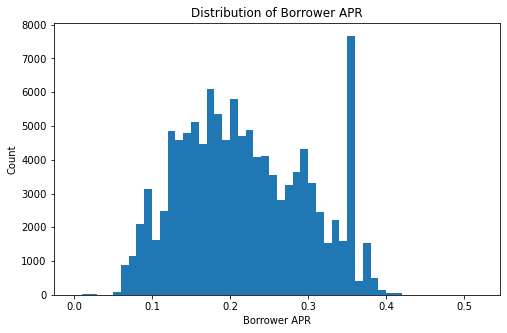

In [5]:
# Distribution of Borrower APR
bins = np.arange(0, loan.BorrowerAPR.max()+0.01, 0.01)

plt.figure(figsize=[8, 5])
plt.hist(data = loan, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count')
plt.title('Distribution of Borrower APR')
plt.show;

## Distribution of Loan Original Amount

The original loan amount distribution shows that there are a number of high and low spikes. The high spikes include;

2k, 3k, 4k, 5k, 10k, 15k, 20k and 25k

The low spikes include;

6k, 7k, 12k, 13k, 14k, 17k, 35k and many others

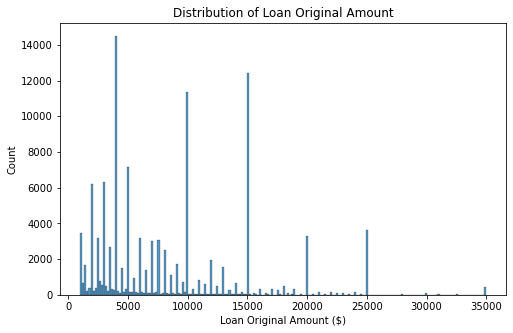

In [6]:
# Distribution of Loan Original Amount
plt.figure(figsize = [8,5])
sb.histplot(loan.LoanOriginalAmount, kde = False, bins = 200)
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Count')
plt.title('Distribution of Loan Original Amount')
plt.show;

## Borrower APR vs Loan Amount

Plotting the Borrower APR against the Loan Amount indicates that there is a negative linear correlation between Borrower APR and Loan Amount. The more there is an increase in the Loan Amount, the lower the APR is for the borrower.

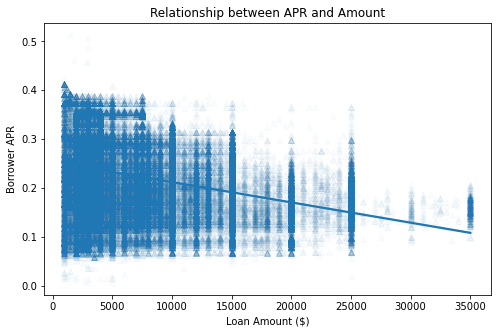

In [7]:
# Relationship between APR and Amount
plt.figure(figsize = [8, 5])
sb.regplot(data = loan, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha':1/50}, marker= '^')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Borrower APR')
plt.title('Relationship between APR and Amount');

## Borrower APR vs Loan Amount

 There is a negative relationship between borrower APR and prosper rating. That means the better the rating, the lower the APR.

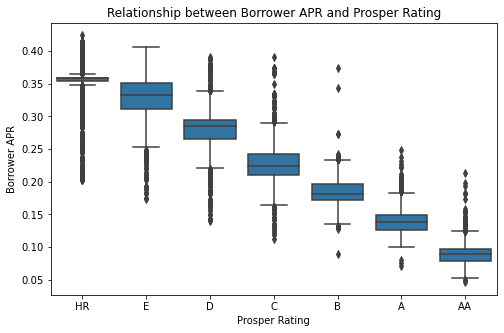

In [8]:
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.boxplot(data=loan, x='ProsperRating (Alpha)', y='BorrowerAPR', color=color)
plt.xlabel('Prosper Rating')
plt.ylabel('Borrower APR')
plt.title('Relationship between Borrower APR and Prosper Rating');

## Prosper Rating and Term vs Monthly Income and Loan Amount

The comparison of Loan Amount and Monthly Income in terms of the effect of Term shows an indication that Term has a significant impact on loan amount and rating where as there is no signifcant impact on monthly income and rating. As and when the ratings improve, the loan amount amongst all the categories of term increases significantly.

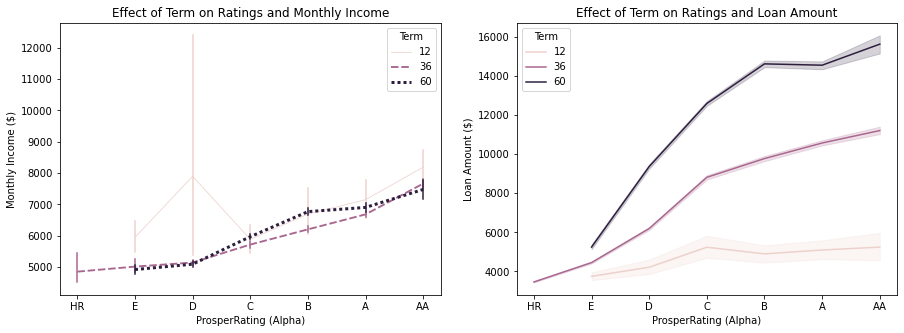

In [9]:
plt.figure(figsize = [15, 5]) 

# StatedMonthlyIncome on left
plt.subplot(1, 2, 1) 
sb.lineplot(data = loan, x = 'ProsperRating (Alpha)', y = 'StatedMonthlyIncome', hue = 'Term',
           style = 'Term', err_style='bars', size = 'Term')
plt.ylabel('Monthly Income ($)')
plt.title('Effect of Term on Ratings and Monthly Income')

# DebtToIncomeRatio on right
plt.subplot(1, 2, 2)
sb.lineplot(data = loan, x = 'ProsperRating (Alpha)', y = 'LoanOriginalAmount', hue = 'Term')
plt.ylabel('Loan Amount ($)')
plt.title('Effect of Term on Ratings and Loan Amount');

In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_template.ipynb to slides
[NbConvertApp] Writing 811731 bytes to Part_II_slide_deck_template.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\JusticeAnnan\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\JusticeAnnan\anaconda3\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\JusticeAnnan\anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\JusticeAnnan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\JusticeAnnan\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    sel